In [90]:
import pandas as pd

In [91]:
conversion_factor = 627.509474
dimer = -97.050557670754 * conversion_factor
print(dimer)

-60900.1443953815


In [92]:
# df_lig = pd.read_parquet("../output_dfs/lig_data_moltest.parquet", columns=["ligand_name", "xtb-gfn-ohess-electronic_energy"])
# df_ts  = pd.read_parquet("../output_dfs/ts_data_moltest.parquet", columns=["ligand_name",  "rpos", "smiles", "xtb-gfn-ohess-electronic_energy"])

df_lig = pd.read_parquet("../output_dfs/lig_data.parquet", columns=["ligand_name", "xtb-gfn-ohess-electronic_energy"])
df_ts  = pd.read_parquet("../output_dfs/ts_data.parquet", columns=["ligand_name",  "rpos", "smiles", "xtb-gfn-ohess-electronic_energy"])
df_ir_lig = pd.read_parquet("../output_dfs/ir_lig_data.parquet", columns=["ligand_name", "xtb-gfn-ohess-electronic_energy"])
df_ir_ts  = pd.read_parquet("../output_dfs/ir_ts_data.parquet", columns=["ligand_name", "rpos", "smiles", "xtb-gfn-ohess-electronic_energy"])

In [93]:
df = df_ts.merge(df_lig, on='ligand_name', how='left', suffixes=('_ts', '_lig'))

In [94]:
df_ir = df_ir_ts.merge(df_ir_lig, on='ligand_name', how='left', suffixes=('_ts', '_lig'))

In [95]:
df_combined = pd.concat([df, df_ir], ignore_index=True)

In [96]:
# df_combined = df

In [97]:
energy_cols = [col for col in df_combined.columns if 'energy' in col]
df_combined[energy_cols] = df_combined[energy_cols] * conversion_factor

In [98]:
df_combined["dE"] = (2 * (df_combined["xtb-gfn-ohess-electronic_energy_ts"] - df_combined["xtb-gfn-ohess-electronic_energy_lig"]) - dimer) / 2

In [99]:
df_combined[df_combined["ligand_name"] == "4-(pyrrol-1-ylmethyl)phenol"]

,ligand_name,rpos,smiles,xtb-gfn-ohess-electronic_energy_ts,xtb-gfn-ohess-electronic_energy_lig,dE
21,4-(pyrrol-1-ylmethyl)phenol,2,OC(C=C1)=CC=C1CN2C=CC=C2,-53122.978893,-22680.106569,7.199874
22,4-(pyrrol-1-ylmethyl)phenol,3,OC(C=C1)=CC=C1CN2C=CC=C2,-53113.318424,-22680.106569,16.860343
23,4-(pyrrol-1-ylmethyl)phenol,9,OC(C=C1)=CC=C1CN2C=CC=C2,-53125.145053,-22680.106569,5.033714
24,4-(pyrrol-1-ylmethyl)phenol,10,OC(C=C1)=CC=C1CN2C=CC=C2,-53122.775463,-22680.106569,7.403303


In [100]:
df_combined

,ligand_name,rpos,smiles,xtb-gfn-ohess-electronic_energy_ts,xtb-gfn-ohess-electronic_energy_lig,dE
0,1-methylindole,4,CN1C2=C(C=CC=C2)C=C1,-47246.385857,-16809.957438,13.643779
1,1-methylindole,5,CN1C2=C(C=CC=C2)C=C1,-47245.749738,-16809.957438,14.279898
2,1-methylindole,6,CN1C2=C(C=CC=C2)C=C1,-47246.147649,-16809.957438,13.881987
3,1-methylindole,7,CN1C2=C(C=CC=C2)C=C1,-47246.459765,-16809.957438,13.569871
4,1-methylindole,8,CN1C2=C(C=CC=C2)C=C1,-47251.763438,-16809.957438,8.266198
...,...,...,...,...,...,...
96,6-fluoro-2-methyl-1H-benzimidazole,4,Cc1nc2cc(F)ccc2[nH]1,-50080.652818,-19642.592262,12.011642
97,6-fluoro-2-methyl-1H-benzimidazole,7,Cc1nc2cc(F)ccc2[nH]1,-50078.583775,-19642.592262,14.080685
98,6-fluoro-2-methyl-1H-benzimidazole,8,Cc1nc2cc(F)ccc2[nH]1,-50081.881550,-19642.592262,10.782910
99,pyrimidine-2-carbonitrile,4,N#Cc1ncccn1,-43573.791542,-13136.189917,12.470572


In [101]:
from tooltoad.chemutils import ac2mol
from tooltoad.vis import MolTo3DGrid

from rdkit import Chem

loc = 2

mol = Chem.MolFromSmiles(df_combined["smiles"].iloc[loc])

MolTo3DGrid(mol, show_labels=True)

[11:59:09] Molecule does not have explicit Hs. Consider calling AddHs()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

x = 1.213 y + 12.480

In [119]:
df_combined["dE"] = 1.213 * df_combined["dE"] + 12.480

In [130]:
df_combined.groupby(["ligand_name"]).head(1)

,ligand_name,rpos,smiles,xtb-gfn-ohess-electronic_energy_ts,xtb-gfn-ohess-electronic_energy_lig,dE
0,1-methylindole,4,CN1C2=C(C=CC=C2)C=C1,-47246.385857,-16809.957438,29.029903
6,1-methylpyrrole,2,CN1C=CC=C1,-41228.874700,-10785.823059,20.995935
8,"2,3-dihydrothieno[3,4-b][1,4]dioxine",1,C12=CSC=C1OCCO2,-47558.973664,-17113.307162,17.824109
9,2-methoxy-1-methylpyrrole,5,CN1C(OC)=CC=C1,-45763.956658,-15323.981761,24.728027
12,2-methoxyfuran,3,COC1=CC=CO1,-44171.004652,-13729.116025,22.406671
15,2-methylfuran,2,CC1=CC=CO1,-41618.724158,-11179.869997,26.087478
18,2-tert-butylfuran,3,CC(C1=CC=CO1)(C)C,-47572.907521,-17140.368820,33.748131
21,4-(pyrrol-1-ylmethyl)phenol,2,OC(C=C1)=CC=C1CN2C=CC=C2,-53122.978893,-22680.106569,21.213447
25,furan,0,C1=CC=CO1,-39634.079835,-9189.895778,19.622315
27,furan-2-yloxy(trimethyl)silane,5,C[Si](C)(OC1=CC=CO1)C,-49894.112857,-19450.590419,20.424859


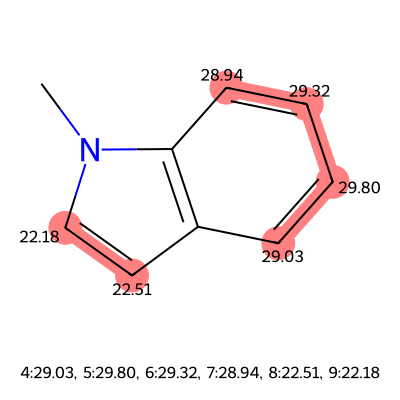

In [124]:
from rdkit import Chem
from rdkit.Chem import Draw

def annotate_all_positions(
    smi: str,
    pos_list: list[int],
    dE_list: list[float],
    subImgSize=(400,400)
):
    # 0) turn the stored MolBlock back into an RDKit Mol
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        raise ValueError("Invalid MolBlock")

    # 1) set each atomNote on the reactive positions
    for pos, dE in zip(pos_list, dE_list):
        mol.GetAtomWithIdx(pos).SetProp('atomNote', f"{dE:.2f}")

    # 2) draw the molecule, highlighting those atoms
    img = Draw.MolsToGridImage(
        [mol],
        legends=[", ".join(f"{p}:{e:.2f}" for p, e in zip(pos_list, dE_list))],
        molsPerRow=1,
        subImgSize=subImgSize,
        highlightAtomLists=[pos_list],
        returnPNG=False
    )
    return img

group     = df_combined[df_combined['ligand_name']=='1-methylindole']
pos_list  = group['rpos'].tolist()
dE_list   = group['dE'].tolist()
smi = group['smiles'].iloc[0]

img = annotate_all_positions(smi, pos_list, dE_list)
display(img)

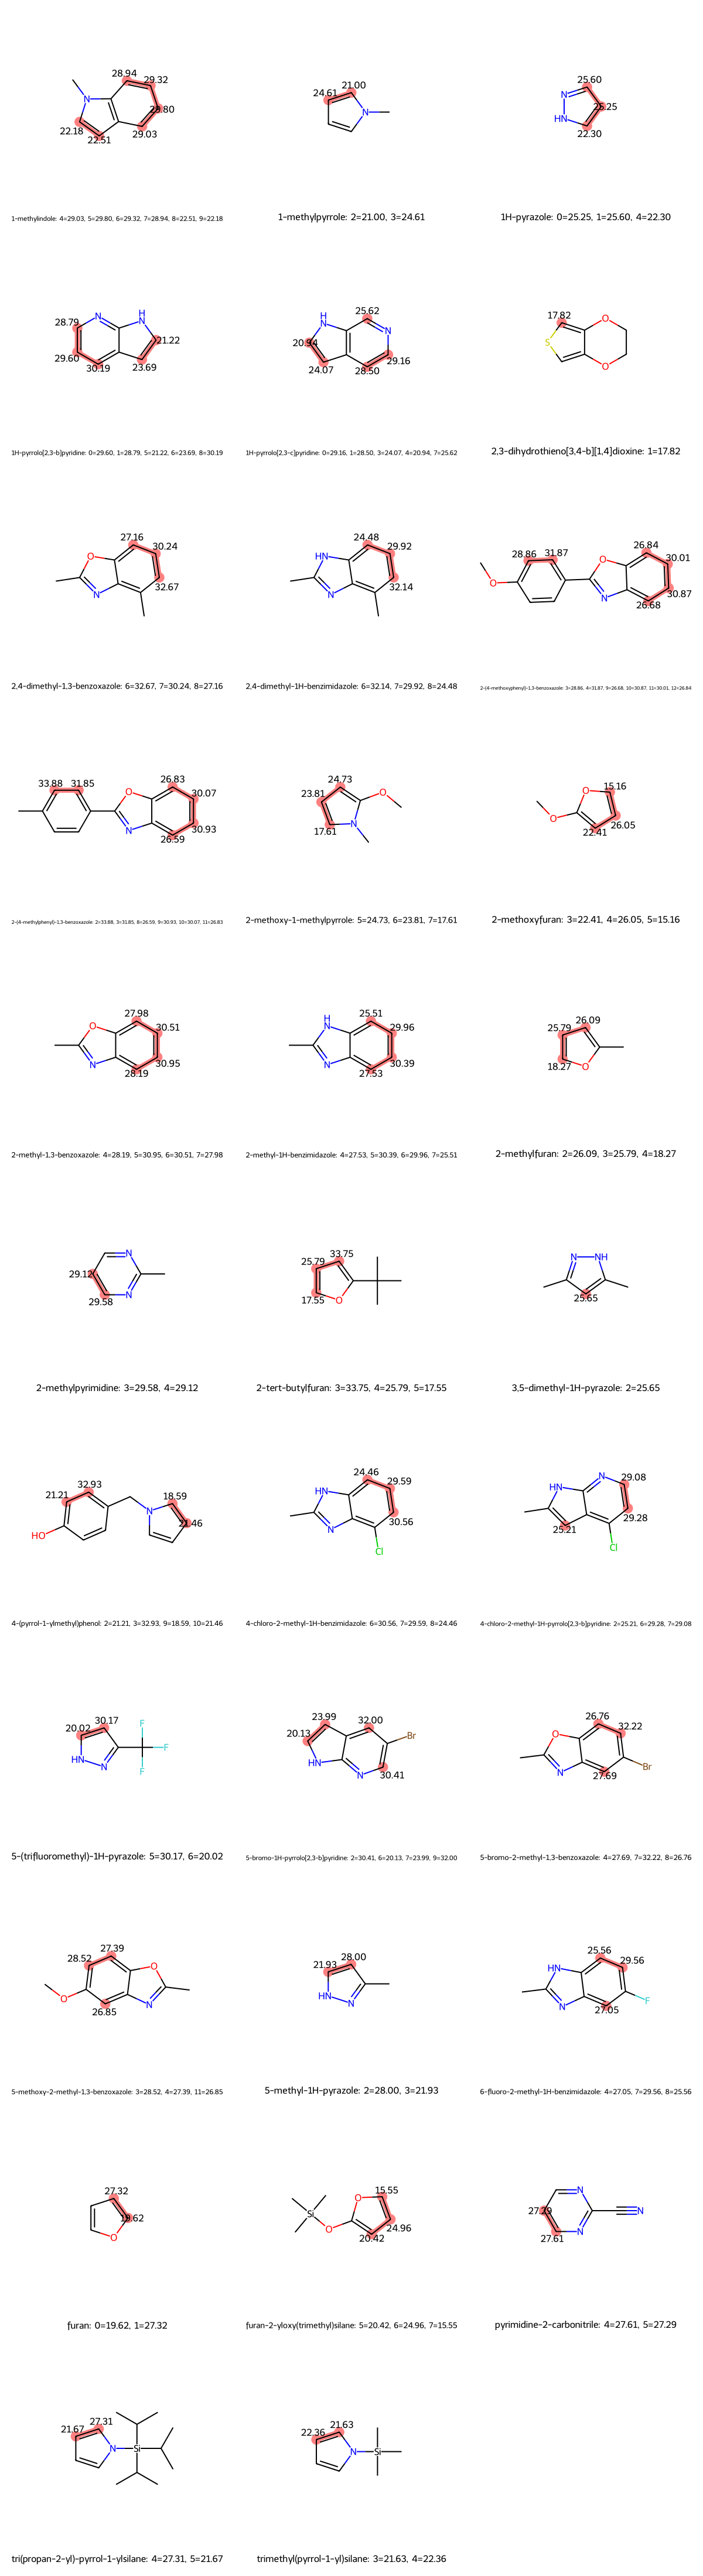

In [122]:
from rdkit import Chem
from rdkit.Chem import Draw

from rdkit.Chem.Draw import rdMolDraw2D

opts = rdMolDraw2D.MolDrawOptions()
#opts.legendFontSize     = 10   # default is ~14
opts.annotationFontScale = 1 # scale for atomNotes

def annotate_ligand_grid(
    df,
    ligand_col: str = "ligand_name",
    smiles_col: str = "smiles",
    rpos_col: str = "rpos",
    energy_col: str = "dE",
    cols: int = 3,
    subImgSize: tuple = (300, 300)
):
    """
    Group df by ligand_col, annotate each ligand at all its rpos with energy_col,
    and draw them in a grid.

    Returns an RDKit PIL image.
    """
    mols = []
    legends = []
    highlights = []

    for ligand, grp in df.groupby(ligand_col):
        smi       = grp[smiles_col].iloc[0]
        pos_list  = grp[rpos_col].tolist()
        e_list    = grp[energy_col].tolist()

        mol = Chem.MolFromSmiles(smi)
        if mol is None:
            raise ValueError(f"Invalid SMILES for {ligand}: {smi}")

        # attach notes
        for pos, e in zip(pos_list, e_list):
            mol.GetAtomWithIdx(pos).SetProp("atomNote", f"{e:.2f}")

        mols.append(mol)
        legends.append(f"{ligand}: " + ", ".join(f"{p}={e:.2f}" for p, e in zip(pos_list, e_list)))
        highlights.append(pos_list)

    grid = Draw.MolsToGridImage(
        mols,
        legends=legends,
        highlightAtomLists=highlights,
        molsPerRow=cols,
        subImgSize=subImgSize,
        returnPNG=False,
        drawOptions=opts
    )
    return grid

from IPython.display import display

img = annotate_ligand_grid(
    df_combined,
    ligand_col="ligand_name",
    smiles_col="smiles",
    rpos_col="rpos",
    energy_col="dE",
    cols=3,
    subImgSize=(400,400)
)
display(img)

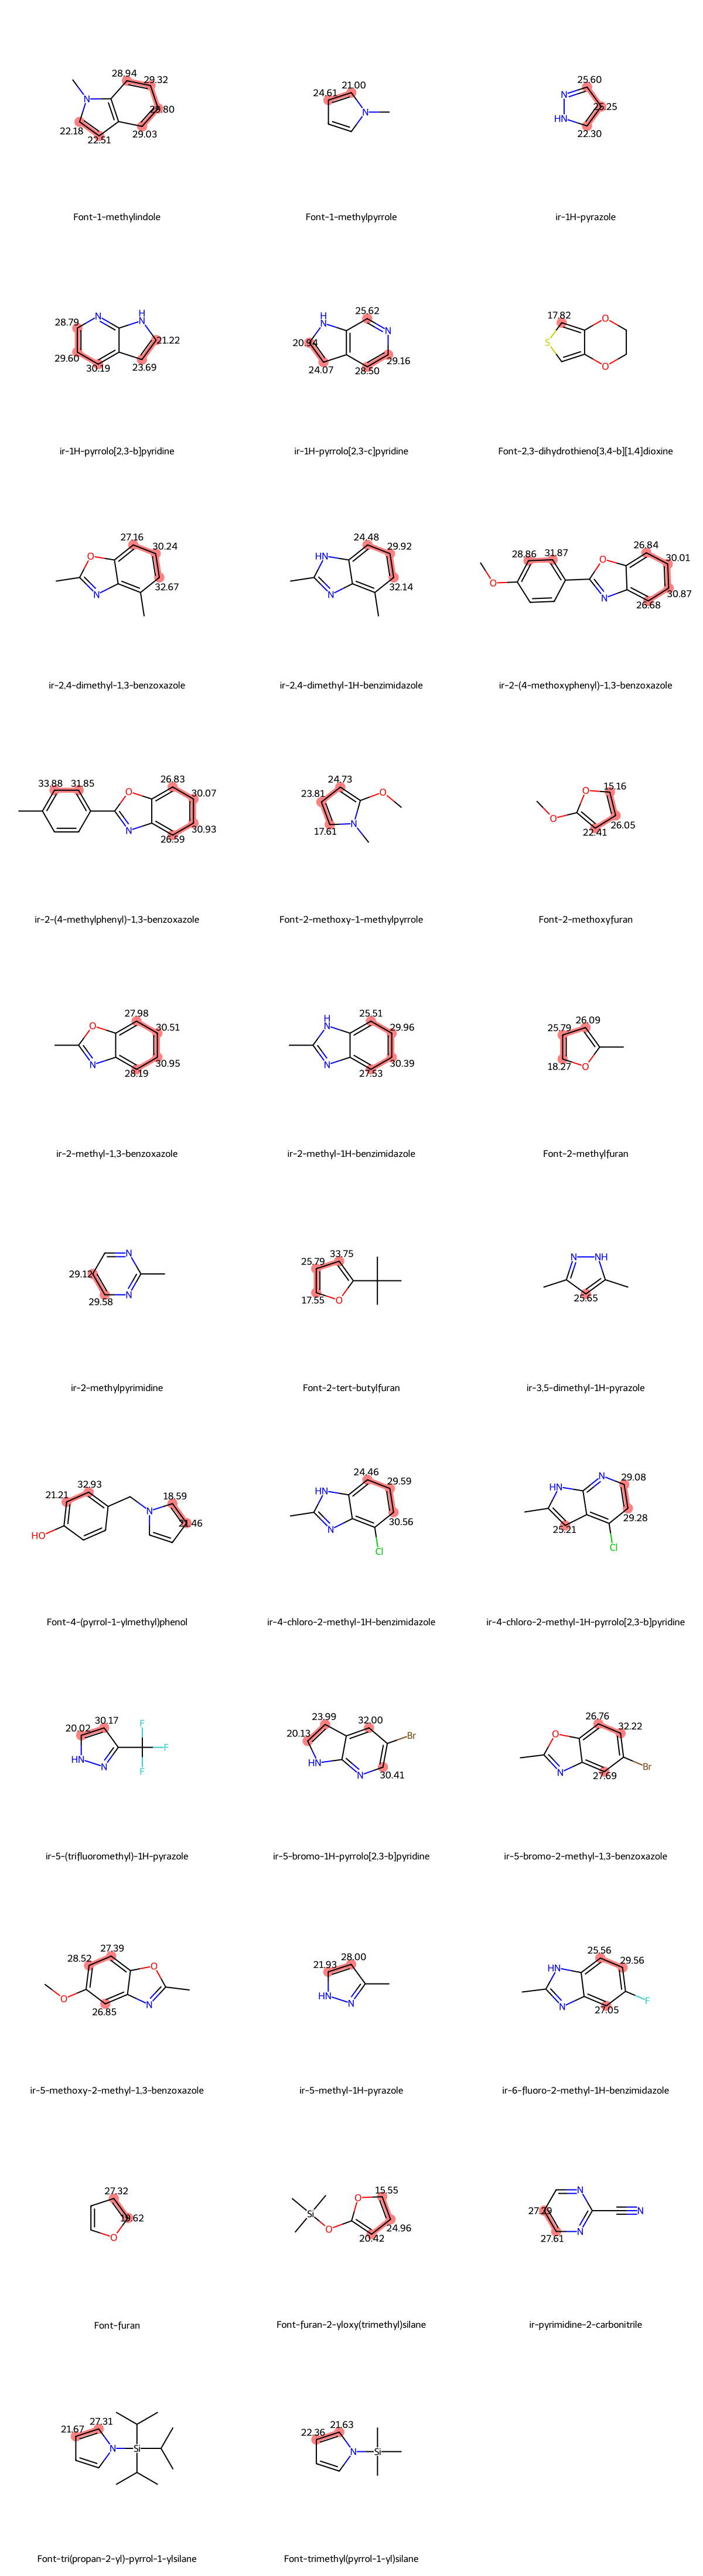

In [133]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

# enlarge annotation font
opts = rdMolDraw2D.MolDrawOptions()
opts.annotationFontScale = 1.0

# replace these with your actual “Font” set
FONT_SMILES = {
    "CN1C=CC=C1",
    "OC(C=C1)=CC=C1CN2C=CC=C2",
    "CC([Si](N1C=CC=C1)(C(C)C)C(C)C)C",
    "C[Si](N1C=CC=C1)(C)C",
    "CN1C2=C(C=CC=C2)C=C1",
    "C12=CSC=C1OCCO2",
    "CN1C(OC)=CC=C1",
    "C1=CC=CO1",
    "CC1=CC=CO1",
    "CC(C1=CC=CO1)(C)C",
    "COC1=CC=CO1",
    "C[Si](C)(OC1=CC=CO1)C",
}


def annotate_ligand_grid(
    df,
    ligand_col: str = "ligand_name",
    smiles_col: str = "smiles",
    rpos_col: str = "rpos",
    energy_col: str = "dE",
    cols: int = 3,
    subImgSize: tuple = (300, 300)
):
    """
    Group df by ligand_col, annotate each ligand at all its rpos with energy_col,
    and draw them in a grid.  Legends are prefixed with 'Font' or 'ir'
    depending on whether the SMILES is in FONT_SMILES.
    """
    mols = []
    legends = []
    highlights = []

    for ligand, grp in df.groupby(ligand_col):
        smi       = grp[smiles_col].iloc[0]
        pos_list  = grp[rpos_col].tolist()
        e_list    = grp[energy_col].tolist()

        # decide the prefix
        prefix = "Font" if smi in FONT_SMILES else "ir"

        mol = Chem.MolFromSmiles(smi)
        if mol is None:
            raise ValueError(f"Invalid SMILES for {ligand}: {smi}")

        # attach atom‐level notes
        for pos, e in zip(pos_list, e_list):
            mol.GetAtomWithIdx(pos).SetProp("atomNote", f"{e:.2f}")

        mols.append(mol)

        # build legend with prefix, ligand name, positions & energies
        legend = (
            f"{prefix}-{ligand}"
        )
        #  ".join(f"{p}={e:.2f}" for p, e in zip(pos_list, e_list))

        legends.append(legend)
        highlights.append(pos_list)

    # draw the grid
    grid = Draw.MolsToGridImage(
        mols,
        legends=legends,
        highlightAtomLists=highlights,
        molsPerRow=cols,
        subImgSize=subImgSize,
        drawOptions=opts,
        returnPNG=False
    )
    return grid

img = annotate_ligand_grid(
    df_combined,
    ligand_col="ligand_name",
    smiles_col="smiles",
    rpos_col="rpos",
    energy_col="dE",
    cols=3,
    subImgSize=(400,400)
)
display(img)